In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
dataset1 = pd.read_csv('Deep learning ex01.csv')
X = dataset1[['INPUT']].values
y = dataset1[['OUTPUT']].values

In [11]:
dataset1.head()

,INPUT,OUTPUT
0,1,90
1,2,80
2,3,70
3,4,60
4,5,50


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [13]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [15]:
# Name: DIVYA LAKSHMI M
# Register Number: 212224040082

class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1=nn.Linear(1,8)
        self.fc2=nn.Linear(8,10)
        self.fc3=nn.Linear(10,1)
        self.relu=nn.ReLU()
        self.history={'loss':[]}

  def forward(self,x):
        x=self.relu(self.fc1(x))
        x=self.relu(self.fc2(x))
        x=self.fc3(x)
        return x

In [16]:
# Initialize the Model, Loss Function, and Optimizer
ai_brain = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(ai_brain.parameters(),lr=0.001)

In [17]:
# Name: DIVYA LAKSHMI M
# Register Number: 212224040082
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss=criterion(ai_brain(X_train),y_train)
        loss.backward()
        optimizer.step()

        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


In [18]:
train_model(ai_brain, X_train_tensor, y_train_tensor, criterion, optimizer)


Epoch [0/2000], Loss: 1551.583496
Epoch [200/2000], Loss: 1456.680298
Epoch [400/2000], Loss: 1341.409912
Epoch [600/2000], Loss: 1143.174072
Epoch [800/2000], Loss: 906.448547
Epoch [1000/2000], Loss: 696.957153
Epoch [1200/2000], Loss: 567.165588
Epoch [1400/2000], Loss: 500.373474
Epoch [1600/2000], Loss: 469.350891
Epoch [1800/2000], Loss: 445.910065


In [19]:
with torch.no_grad():
    test_loss = criterion(ai_brain(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')


Test Loss: 1210.504639


In [20]:
loss_df = pd.DataFrame(ai_brain.history)

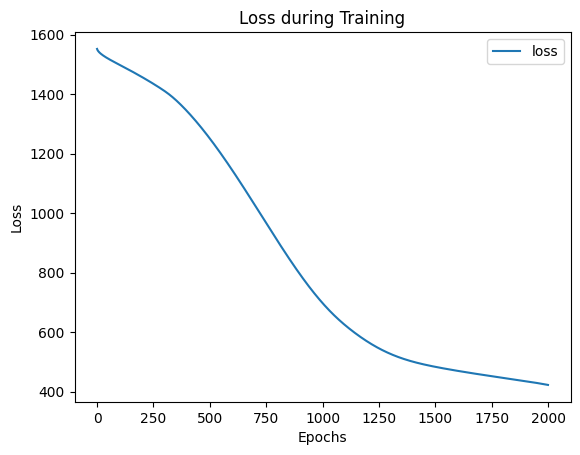

In [21]:
import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [23]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = ai_brain(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 32.970603942871094
